# Fake News Detector - Notebook 1

In this notebook we investigate the nature of the fake news dataset and conduct data cleansing to remove missing values and duplicates.

Source of data: https://www.kaggle.com/datasets/ruchi798/source-based-news-classification

In [7]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [8]:
uploaded = files. upload()

Saving news_articles.csv to news_articles.csv


In [9]:
data = pd.read_csv("news_articles.csv")

In [10]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [11]:
data.tail()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0
2095,Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [13]:
data.shape

(2096, 12)

In [14]:
data.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [15]:
data.dtypes

,0
author,object
published,object
title,object
text,object
language,object
site_url,object
main_img_url,object
type,object
label,object
title_without_stopwords,object


## Data Cleansing

- Remove rows with missing values
- Remove duplicated rows

In [16]:
#finding rows with missing values. If a row has a missing value in a row, then return True

missing_values_rows = data.isnull().any(axis=1)
print(missing_values_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
2091     True
2092     True
2093     True
2094     True
2095     True
Length: 2096, dtype: bool


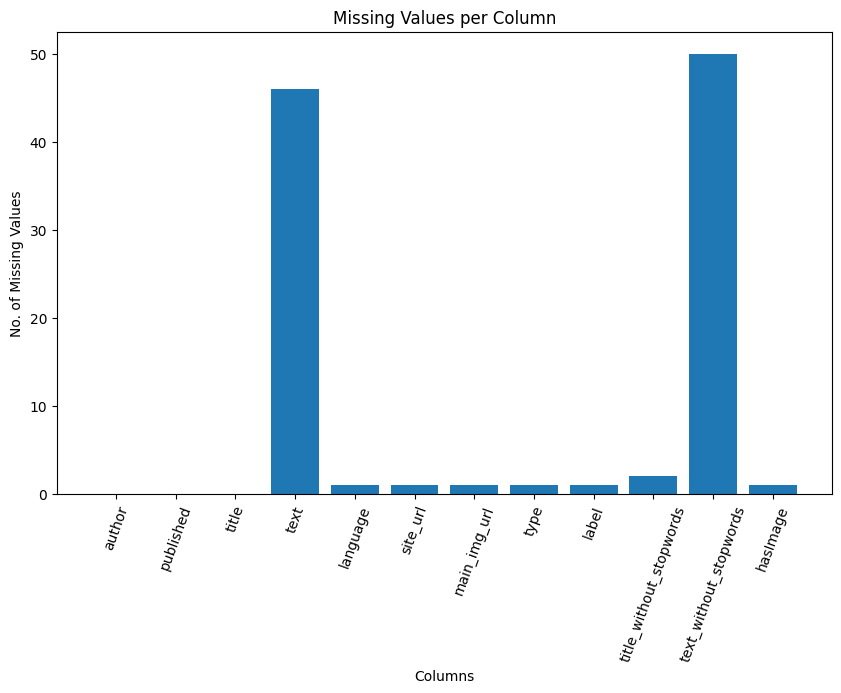

In [17]:
missing_values = data.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Columns')
plt.ylabel('No. of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=70)
plt.show()

In [18]:
# finding duplicate rows
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

        author                      published     title  \
66   Anonymous  2016-10-26T22:35:00.000+03:00  no title   
67   Anonymous  2016-10-26T22:19:00.000+03:00  no title   
74   Anonymous  2016-10-27T21:50:00.000+03:00  no title   
76   Anonymous  2016-10-27T21:50:00.000+03:00  no title   
96   Anonymous  2016-10-29T22:36:00.000+03:00  no title   
102  Anonymous  2016-10-29T22:36:00.000+03:00  no title   
103  Anonymous  2016-10-29T22:25:00.000+03:00  no title   
114  Anonymous  2016-10-31T01:50:00.000+02:00  no title   
116  Anonymous  2016-10-30T10:17:00.000+02:00  no title   
118  Anonymous  2016-10-30T10:17:00.000+02:00  no title   

                                                  text language  \
66   trump has an excuse now to audit any vote with...  english   
67   he has got to go after him  he is the one caus...  english   
74   georg soros the good oil  httpmailstarnetsoros...  english   
76   georg soros the good oil  httpmailstarnetsoros...  english   
96   the second

In [19]:
#dropping rows with missing values
data.dropna(axis=0, inplace=True)


In [20]:
#rerun missing values analysis
missing_values_rows = data.isnull().any(axis=1)
print(missing_values_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
2041    False
2042    False
2043    False
2044    False
2045    False
Length: 2045, dtype: bool


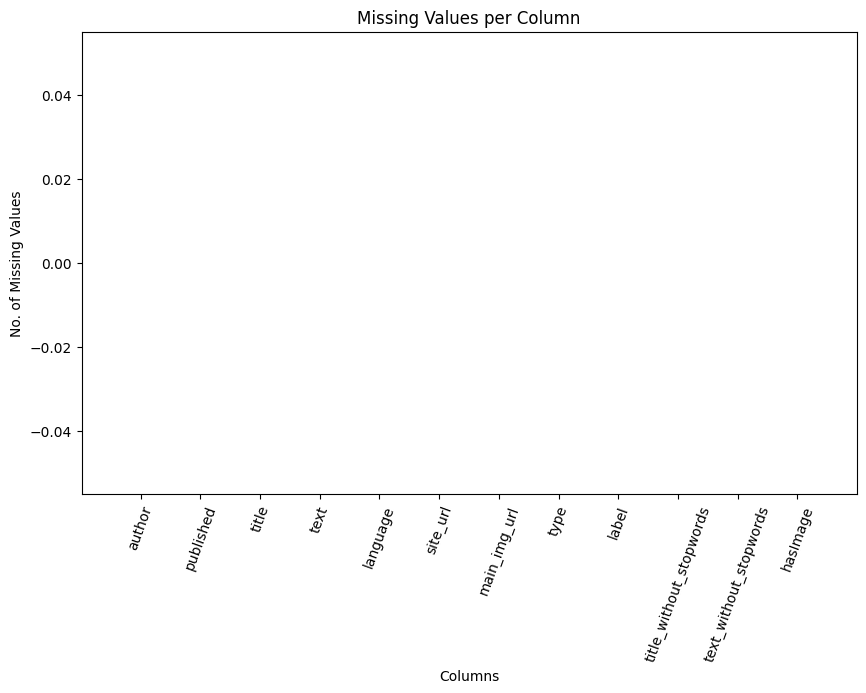

In [21]:
missing_values = data.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Columns')
plt.ylabel('No. of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=70)
plt.show()

In [22]:
#drop duplicate values
data.drop_duplicates(inplace=True)

In [23]:
#rerun duplicates analysis
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [author, published, title, text, language, site_url, main_img_url, type, label, title_without_stopwords, text_without_stopwords, hasImage]
Index: []


In [24]:
#save cleansed dataset
data.to_csv("cleaned_dataset.csv", index=False)

In [25]:
file_path = "cleaned_dataset.csv"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>